In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
insurance = pd.read_csv("insurance.csv")

In [4]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: ylabel='age'>

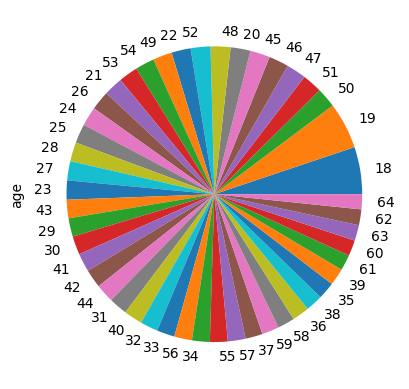

In [6]:
import matplotlib.pyplot as plt
insurance['age'].value_counts().plot(kind='pie')

<Axes: ylabel='region'>

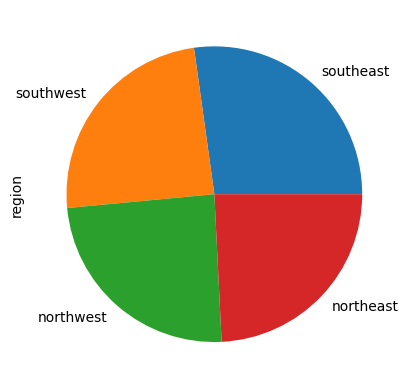

In [7]:
insurance["region"].value_counts().plot(kind = "pie")

In [8]:
df = pd.get_dummies(insurance, drop_first = True)
df.head(5)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [9]:
X = df.drop("charges", axis =1)
y = df["charges"]

In [10]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
# Build a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100)
    ])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"]
              )

model.fit(X_train, y_train, verbose = 1, epochs = 250)

Epoch 1/250
28/28 [==============================] - 1s 2ms/step - loss: 13312.6123 - mae: 13312.6123
Epoch 2/250
28/28 [==============================] - 0s 2ms/step - loss: 11943.7061 - mae: 11943.7061
Epoch 3/250
28/28 [==============================] - 0s 2ms/step - loss: 8035.8950 - mae: 8035.8950
Epoch 4/250
28/28 [==============================] - 0s 2ms/step - loss: 7464.6548 - mae: 7464.6548
Epoch 5/250
28/28 [==============================] - 0s 2ms/step - loss: 7379.2197 - mae: 7379.2197
Epoch 6/250
28/28 [==============================] - 0s 2ms/step - loss: 7314.3784 - mae: 7314.3784
Epoch 7/250
28/28 [==============================] - 0s 2ms/step - loss: 7248.2432 - mae: 7248.2432
Epoch 8/250
28/28 [==============================] - 0s 2ms/step - loss: 7190.9321 - mae: 7190.9321
Epoch 9/250
28/28 [==============================] - 0s 3ms/step - loss: 7082.0820 - mae: 7082.0820
Epoch 10/250
28/28 [==============================] - 0s 3ms/step - loss: 7002.0386 - mae: 7002.

In [14]:
y_pred = model.predict(X_test)

14/14 [==============================] - 0s 2ms/step


In [15]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 1ms/step - loss: 3241.2703 - mae: 3241.2703


[3241.270263671875, 3241.270263671875]

In [16]:
y_train.median() , y_train.mean()

(9556.297050000001, 13379.68825002232)

In [17]:
Model_A = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100)
])


Model_A.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

Model_A.fit(X_train,y_train, epochs = 300)


Epoch 1/300
28/28 [==============================] - 0s 1ms/step - loss: 12005.4072 - mae: 12005.4072
Epoch 2/300
28/28 [==============================] - 0s 1ms/step - loss: 9204.5186 - mae: 9204.5186
Epoch 3/300
28/28 [==============================] - 0s 1ms/step - loss: 8914.3691 - mae: 8914.3691
Epoch 4/300
28/28 [==============================] - 0s 1ms/step - loss: 8629.7119 - mae: 8629.7119
Epoch 5/300
28/28 [==============================] - 0s 2ms/step - loss: 9198.3643 - mae: 9198.3643
Epoch 6/300
28/28 [==============================] - 0s 1ms/step - loss: 8893.3818 - mae: 8893.3818
Epoch 7/300
28/28 [==============================] - 0s 2ms/step - loss: 9181.1523 - mae: 9181.1523
Epoch 8/300
28/28 [==============================] - 0s 1ms/step - loss: 9195.9980 - mae: 9195.9980
Epoch 9/300
28/28 [==============================] - 0s 1ms/step - loss: 8843.4229 - mae: 8843.4229
Epoch 10/300
28/28 [==============================] - 0s 1ms/step - loss: 9108.7598 - mae: 9108.75

In [18]:
Model_B = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])


Model_B.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

Model_B.fit(X_train,y_train, epochs = 100)


Epoch 1/100
28/28 [==============================] - 0s 1ms/step - loss: 13350.6377 - mae: 13350.6377
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 13339.4756 - mae: 13339.4756
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 13327.8223 - mae: 13327.8223
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 13315.3447 - mae: 13315.3447
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 13301.8887 - mae: 13301.8887
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 13287.2441 - mae: 13287.2441
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 13271.1533 - mae: 13271.1533
Epoch 8/100
28/28 [==============================] - 0s 1ms/step - loss: 13253.5488 - mae: 13253.5488
Epoch 9/100
28/28 [==============================] - 0s 1ms/step - loss: 13233.9795 - mae: 13233.9795
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 13212.23

In [19]:
Model_C = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])


Model_C.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

Model_C.fit(X_train,y_train, epochs = 500)


Epoch 1/500
28/28 [==============================] - 1s 2ms/step - loss: 13330.1348 - mae: 13330.1348
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 13181.4346 - mae: 13181.4346
Epoch 3/500
28/28 [==============================] - 0s 1ms/step - loss: 12917.9463 - mae: 12917.9463
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 12448.0469 - mae: 12448.0469
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 11689.6572 - mae: 11689.6572
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 10623.2051 - mae: 10623.2051
Epoch 7/500
28/28 [==============================] - 0s 2ms/step - loss: 9409.9551 - mae: 9409.9551
Epoch 8/500
28/28 [==============================] - 0s 1ms/step - loss: 8292.4121 - mae: 8292.4121
Epoch 9/500
28/28 [==============================] - 0s 2ms/step - loss: 7668.0698 - mae: 7668.0698
Epoch 10/500
28/28 [==============================] - 0s 2ms/step - loss: 7502.4019 - ma

In [27]:
Model_D = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100)
])


Model_D.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

Model_D.fit(X_train,y_train, epochs = 500)

Epoch 1/500
28/28 [==============================] - 1s 4ms/step - loss: 12585.2754 - mae: 12585.2754
Epoch 2/500
28/28 [==============================] - 0s 3ms/step - loss: 9009.2979 - mae: 9009.2979
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 9452.4580 - mae: 9452.4580
Epoch 4/500
28/28 [==============================] - 0s 1ms/step - loss: 8923.9951 - mae: 8923.9951
Epoch 5/500
28/28 [==============================] - 0s 1ms/step - loss: 9191.4639 - mae: 9191.4639
Epoch 6/500
28/28 [==============================] - 0s 1ms/step - loss: 8837.0400 - mae: 8837.0400
Epoch 7/500
28/28 [==============================] - 0s 1ms/step - loss: 8809.2402 - mae: 8809.2402
Epoch 8/500
28/28 [==============================] - 0s 2ms/step - loss: 9102.8604 - mae: 9102.8604
Epoch 9/500
28/28 [==============================] - 0s 1ms/step - loss: 8918.5088 - mae: 8918.5088
Epoch 10/500
28/28 [==============================] - 0s 1ms/step - loss: 8887.1162 - mae: 8887.11

In [28]:
print("Model A: ",Model_A.evaluate(X_test,y_test))
print("Model B: ",Model_B.evaluate(X_test,y_test))
print("Model C: ",Model_C.evaluate(X_test,y_test))
print("Model D: ",Model_D.evaluate(X_test,y_test))

14/14 [==============================] - 0s 2ms/step - loss: 6738.2417 - mae: 6738.2417
Model A:  [6738.24169921875, 6738.24169921875]
14/14 [==============================] - 0s 1ms/step - loss: 7384.4038 - mae: 7384.4038
Model B:  [7384.40380859375, 7384.40380859375]
14/14 [==============================] - 0s 2ms/step - loss: 3260.7251 - mae: 3260.7251
Model C:  [3260.72509765625, 3260.72509765625]
14/14 [==============================] - 0s 2ms/step - loss: 11670.6260 - mae: 11670.6260
Model D:  [11670.6259765625, 11670.6259765625]


Standardization and Normalization

<Axes: ylabel='Frequency'>

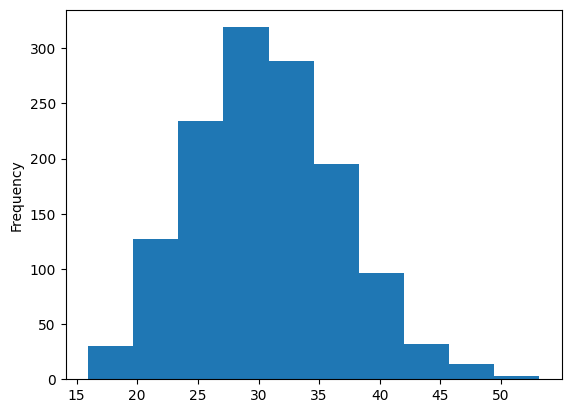

In [29]:
X["bmi"].plot(kind='hist')

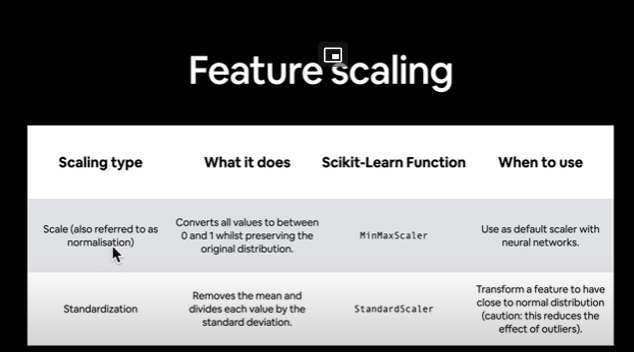

In [30]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit Learn

In [31]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)


# Create X & y
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Build our train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Fit the column transformer to our trainnig data
ct.fit(X_train)

# Transform trainnig and test data with normalization (MinMaxScaler) and OneHot Endcoding

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [33]:
# What does our data look like now?

X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [35]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [38]:
# Build a neural network model to fit on our normalized data

tf.random.set_seed(42)

# 1. Create the model
Model_C.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               900       
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [41]:
insurance_model_C = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_C.compile(loss = "mae",
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics  = ["mae"])

insurance_model_C.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.3232 - mae: 13343.3232
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13332.9600 - mae: 13332.9600
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13307.4375 - mae: 13307.4375
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13255.4268 - mae: 13255.4268
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13165.5645 - mae: 13165.5645
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13027.1865 - mae: 13027.1865
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12830.2559 - mae: 12830.2559
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12564.8184 - mae: 12564.8184
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 12220.9541 - mae: 12220.9541
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11798.79

In [42]:
# Evaluate our insurance model trained on normalized data

insurance_model_C.evaluate(X_test_normal, y_test)

9/9 [==============================] - 1s 1ms/step - loss: 3436.7266 - mae: 3436.7266


[3436.7265625, 3436.7265625]